# CSCI 416 - HW4

### Name: Kyle Chen

# <font color='red'>Problem 1: SVD (20 Points)</font>

We can use Eigenface to recognize faces.
In this assignment you will represent a face image through Eigenfaces. You will be using face images from the Yale Face Database B where there are 10 faces under 64 lighting conditions. 

You can download the data for this assignment at 

http://www.cs.ucsd.edu/classes/sp05/cse152/faces.zip 

For more information on the Yale Face Database, see


http://cvc.cs.yale.edu/cvc/projects/yalefacesB/yalefacesB.html

Take each 50x50 pixel training image and vectorize into an 2500-dimensional vector. Stack each image (a 2500-dimensional vector) as a row vector in a matrix $X$, the entire set of training image vectors. First zero center the data by subtracting the average image $mu$ from all images and get $X$,  the entire set of training image vectors.  
Then perform Singular Value Decomposition (SVD) on the entire set of training image vectors, retaining the first k principal components. 

$$U, \Sigma, V^T = SVD(X)$$

 Choose k such that 

$$\frac{\sum^{k}_{i=1} \sigma^2_i}{\sum^{r}_{i=1} \sigma^2_i} > 90\%$$

where $r$ is the dimension of $\Sigma$, i.e., the number of singular values. The k principal components (the first k row vectors of $V^T$), when converted back to images, are the Eigenfaces, and the span of the k principal components is the Eigenspace.  Display the k eigenfaces as images in your program. 

Let $V'\ ^T$ be the matrix of the first k row vectors of $V^T$. That is, $V'\ ^T$ is a truncated matrix of $V^T$. 

Now pick an image from your data set convert it to a column vector as described before $x$ (column vector). First center it by subtracting $mu$, $x'=x-mu$. $w = V'\ ^T * x$ gives the projection of $x$ to Eigenspace.  Use $mu$, $w$, and $V'\ ^T$ to recover the image. Display the original image and the new image and compare them.  

The following is an example that shows some useful functions. 


        import numpy as np
        import matplotlib.image as mpimg
        import matplotlib.pyplot as plt

        img_name="pic1.jpg"
        # Read image
        img=mpimg.imread(img_name)
        # Reshape image
        fimg = np. reshape(img, 50*50)
        
        # SVD
        u, s, vh = np.linalg.svd(X, full_matrices=False)
        
        # Show two images 
        f = plt.figure()
        f.add_subplot(1,2, 1)
        imgplot = plt.imshow(img1)
        f.add_subplot(1,2, 2)
        imgplot = plt.imshow(img2)

In [3]:
#imports

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

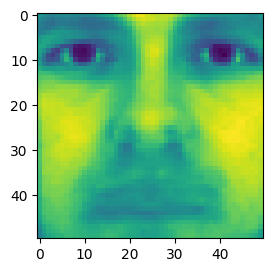

In [4]:
#generate X

# get all files inside a specific folder
#X = np.zeros((640, 2500))
dir_path = r'faces'#r'C:\Users\tankk\Documents\Homework\Y3S1\CSCI416\HW4\faces\\'
sizeOfDir = len(os.listdir(dir_path))
X = np.zeros((sizeOfDir, 2500))
iter = 0

for path in os.scandir(dir_path):
    if path.is_file():
        tempPathName = os.path.join(dir_path,path.name)
        #print(tempPathName)
        img=mpimg.imread(tempPathName)
        fimg = np.reshape(img, 50*50)
        X[iter] = fimg
        iter += 1

#generate and subtract average face

mu = np.average(X, axis = 0)#np.reshape(np.sum(X, axis=0) / sizeOfDir, (50, 50))

stdX = np.copy(X)
#print(X[20, :])
X -= mu

#print(X[0] == stdX[0])

#print(stdX[0], '\n', X[0])
#print(avgFace)

f = plt.figure()
f.add_subplot(1,2, 1)
#imgplot = plt.imshow(np.reshape(X[0, :], (50, 50)))
#f.add_subplot(1,2, 2)
imgplot = plt.imshow(np.reshape(mu, (50, 50)))

In [5]:
# SVD
u, s, vh = np.linalg.svd(X, full_matrices=False)
#print(len(s))
#s is one dimensional

In [6]:
#find k

#print(s)
#print(np.square(s)[0], s[0] * s[0])
k = 0
total = np.sum(np.square(s))
partial = np.sum(np.square(s[:k]))
res = partial / total

while res < 0.9:
    #print(k, res, partial, total)
    
    k += 1
    partial = np.sum(np.square(s[:k]))
    res = partial / total

#print(k, res)

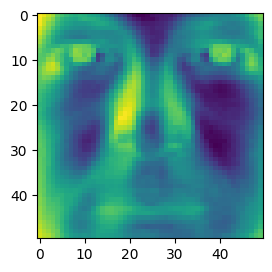

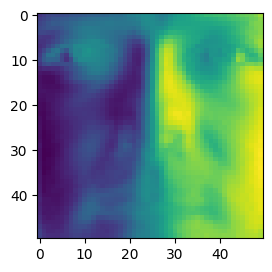

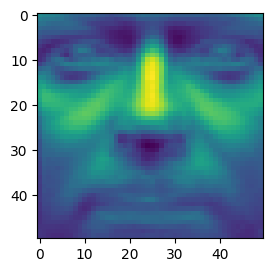

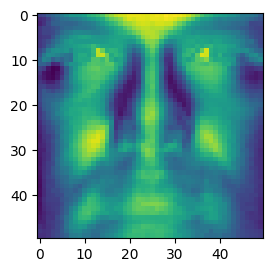

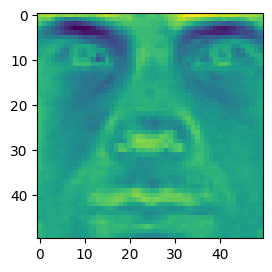

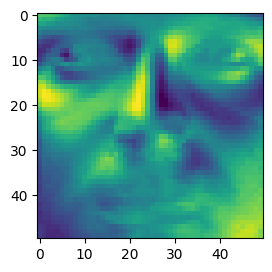

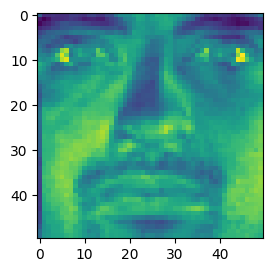

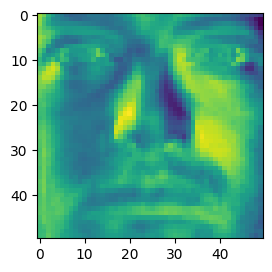

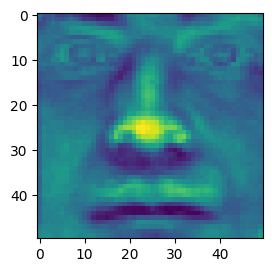

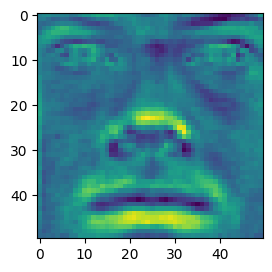

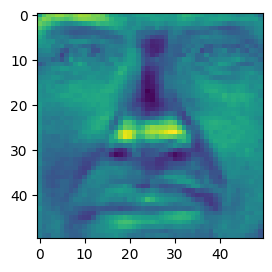

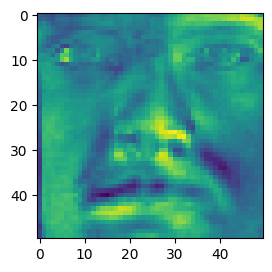

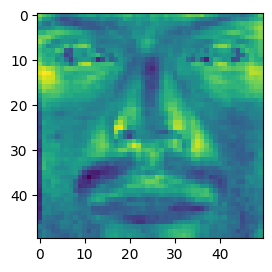

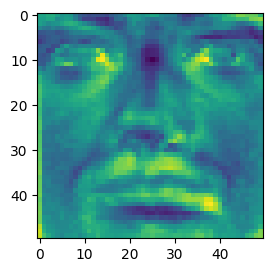

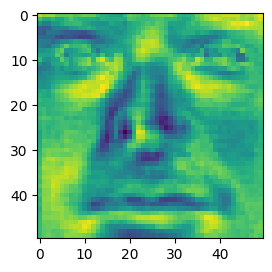

In [7]:
#print first k eigenvectors (in vh)
#setup v'
vprime = np.copy(vh[:k,:])

for i in range(k):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    imgplot = plt.imshow(np.reshape(vprime[i, :], (50, 50)))

448


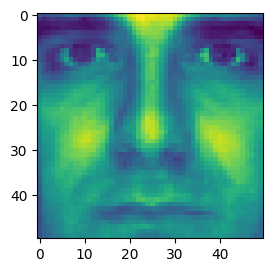

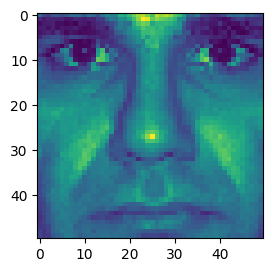

In [8]:
# Now pick an image from your data set convert it to a column vector as described before $x$ (column vector).
# First center it by subtracting $mu$, $x'=x-mu$. $w = V'\ ^T * x$ gives the projection of $x$ to Eigenspace.
# Use $mu$, $w$, and $V'\ ^T$ to recover the image. Display the original image and the new image and compare them.

random = (int) (np.random.rand(1)[0] * X.shape[0])
print(random)
#generate weights for projecting to eigenspace
w = np.dot(vprime, np.reshape(X[random, :], (-1)))#np.reshape(X[random, :], (-1)))

#print x'
#f = plt.figure()
#f.add_subplot(1,2, 1)
#imgplot = plt.imshow(np.reshape(X[random, :], (50, 50)))

#reconstructed
f = plt.figure()
f.add_subplot(1,2, 1)

#applying weights to features of most significant eigenvectors
yprime = np.dot(vprime.T, w)
#[2500, 15] dot [15, 1]
#print(yprime.shape)
#recon = w * (np.reshape(vprime[random, :], (50, 50)) + np.reshape(mu, (50, 50)))
imgplot = plt.imshow(np.reshape(yprime + mu, (50,50)))

#original image for comparison
f = plt.figure()
f.add_subplot(1,2, 1)
imgplot = plt.imshow(np.reshape(stdX[random, :], (50, 50)))

# <font color='red'>Problem 5: Image segmentation using clustering (20 points)</font>

You will next test your implementation by applying clustering to segment and recolor an image. Write your code in a script segment.ipynb.

[5 pts] Download the following images: panda and wm. Load them in your program using img=mpimg.imread("panda.jpeg");. This will return a HxWx3 matrix per image, where H and W denote height and width, and the image has three channels (R, G, B). Convert the image to double format. To avoid a long run of your code, downsample the images (reduce their size) to size around 100x100.

[5 pts] To perform segmentation, you need a representation for every image pixel. We will use a three-dimensional feature representation for each pixel, consisting of the R, G and B values of each pixel. Use fimg = img.reshape(-1, 3) to convert the 3D matrix into a 2D matrix with pixels as the rows and channels (features) as the columns. Use KMeans function in sklearn, to perform clustering over the pixels of the image.

[5 pts] Then recolor the pixels of each image according to their cluster membership. In particular, replace each pixel with the average R, G, B values for the cluster to which the pixel belongs (i.e. recolor using the cluster means). Show the recolored image using imgplot = plt.imshow(img), but convert it to format uint8 before displaying.

[5 pts] Experiment with different values of K = 2,3,4,5. Show the images.

You may start your program as follows:

    from sklearn.cluster import KMeans
    import numpy as np
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
            
    img=mpimg.imread("panda.jpeg")
    print(img.shape)
    # downsample image
    img2=img[::8,::14,::1]
    print(img2.shape)
    # reshape to 2-d
    fimg = img2.reshape(-1, 3)
    print(fimg.shape)

    kmeans = KMeans(n_clusters=2, random_state=0).fit(fimg)
    print(kmeans.labels_)

In [2]:
#imports
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#take in and convert to double format
img1 = (mpimg.imread("panda.jpeg")).astype(np.float64)
img2 = (mpimg.imread("wm.jpeg")).astype(np.float64)

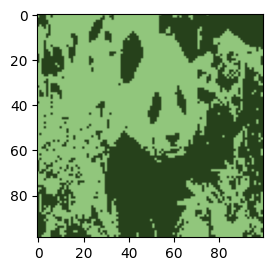

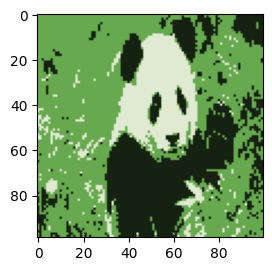

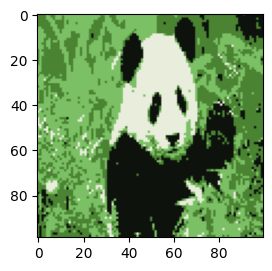

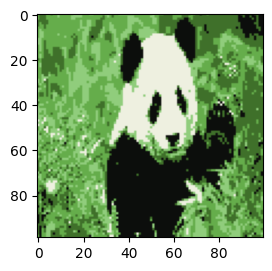

In [3]:
#print(img1.shape)

# downsample image 1
downsample_img1 = img1[::8,::14,::1]
#print(downsample_img1.shape)

# reshape to 2-d
fimg = downsample_img1.reshape(-1, 3)
#print(fimg.shape)
#print(downsample_img1[0,0,:])

'''cluster_centers_ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

labels_ndarray of shape (n_samples,)
Labels of each point

inertia_float
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

n_iter_int
Number of iterations run.

n_features_in_int
Number of features seen during fit.

New in version 0.24.

feature_names_in_ndarray of shape (n_features_in_,)
Names of features seen during fit. Defined only when X has feature names that are all strings.

New in version 1.0.'''

#list_of_img1s = [fimg for i in range(4)]
#for ele in list_of_img1s:
    #print("i")
#print(fimg[0,:])

#print the RGB values of pixel 0,0
#print(downsample_img1[0,0,:])

list_of_img1 = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(fimg)
    #print("i")
    #print(kmeans.labels_.shape)
    #print(kmeans.cluster_centers_.shape)
    
    #get set RGB value to cluster center of classification
    temp = np.zeros_like(fimg)
    for i in range(len(temp)):
        temp[i] = kmeans.cluster_centers_[kmeans.labels_[i]]
    
    list_of_img1.append(np.reshape(temp, (99, 100, 3)).astype(np.uint8))
    
#print R=0/G=1/B=2 feature of the image onto a plot
for ele in list_of_img1:
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(ele)

#print the RGB values of pixel 0,0
#print(downsample_img1[0,0,:])

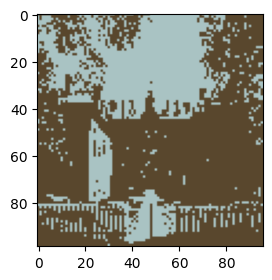

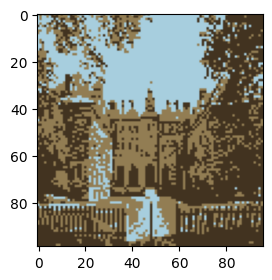

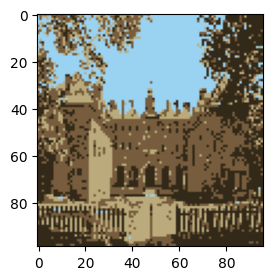

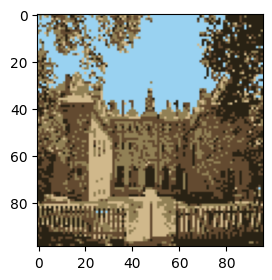

In [27]:
#downsample image 2
#image size is 1080 x 1920
scaleX2 = (int)(img2.shape[0] / 100.0 + 1)
scaleY2 = (int)(img2.shape[1] / 100.0 + 1)

#downsample_img2 = img2[::11,::20,::1]
downsample_img2_dynamic = img2[::scaleX2, ::scaleY2, ::1]
#print(img2.shape)
#print(downsample_img2.shape)
#print(downsample_img2_dynamic.shape)


fimg2 = downsample_img2_dynamic.reshape(-1, 3)
#print(fimg.shape)

list_of_img2 = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(fimg2)
    #print("i")
    #print(kmeans.labels_.shape)
    #print(kmeans.cluster_centers_.shape)
    
    #get set RGB value to cluster center of classification
    temp = np.zeros_like(fimg2)
    for i in range(len(temp)):
        temp[i] = kmeans.cluster_centers_[kmeans.labels_[i]]
    
    list_of_img2.append(np.reshape(temp, (99, 96, 3)).astype(np.uint8))
    
#print R=0/G=1/B=2 feature of the image onto a plot
for ele in list_of_img2:
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(ele)